<a href="https://colab.research.google.com/github/sturu1/THU-PM/blob/master/Copy_of_sung_lec03_logistic_regression(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# logistic_regression 실습(1)

> 이번 시간에는 2개의 class를 분류(**binary classification**)하는 대표적이 알고리즘인 **logistic regression**에 대한 실습을 하겠습니다. 

> logistic regression은 앞서 배웠던 linear regression의 확장판으로 간주할 수 있습니다. 단, linear regression의 결과(출력값)는 [−∞, +∞] 까지 나올수 있기 때문에, 이렇게 나온 출력결과를 [0,1]사이의 값으로 변환하는 작업이 필요합니다. 
Tensorflow나 Keras에서 이러한 변환 작업을 수행하는 역할이 바로 **activation function(활성함수)** 입니다. deep learning에서는 여러가지 활성함수가 사용되는데, 특히 [0,1] 사이의 숫자로 변환하는데 사용하는 activation function은 **sigmoid**라 불리는 함수 입니다. 이렇게 변환된 출력결과를 0과 1의 중간인 0.5와 비교하여 0.5보다 크면 1 클래스, 아니면 0 클래스로 예측한 것으로 해석합니다. 

이번 시간에는 간단한 예제를 통해서 2진분류 기법의 구현을 학습해 보겠습니다. 

 먼저 필요한 모듈을 불러옵니다. 

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


> 입력데이터와 출력데이터를 정의 합니다. 아래에서 보듯이 입력데이터는 2개의 속성을 지닌 6개의 개체로, 출력데이터는 0과 1로 구분되는(2진 분류) 6개의 개체로 구성되어 있습니다. 

In [ ]:
x_data = np.array([[1, 2],
                   [2, 3],
                   [3, 1],
                   [4, 3],
                   [5, 3],
                   [6, 2]])
y_data = np.array([[0],
                   [0],
                   [0],
                   [1],
                   [1],
                   [1]])

In [ ]:
x_data.shape, y_data.shape

((6, 2), (6, 1))

자. 이제 본격적으로 모델을 생성해 보겠습니다. 

먼저 keras의 sequential() 클래스로 model 인스턴스를 생성합니다. 

In [ ]:
model = Sequential()

이번 예제에서도 1개의 층, 1개의 `unit`으로만 구성된 네트워크 구조를 사용하겠습니다. 입력데이터의 각 개체의 모양을 `input_shape`라는 매개변수에 입력해 줍니다. 입력데이터의 속성이 2개 이므로 `(2,)`로 입력하면 되겠군요. 

이 네트워크의 출력 값은 0과 1 사이의 값을 가져야 하므로, `activation` 함수로 `sigmoid`를 사용했습니다. 

결국 이 unit이 하는 일은 입력데이터(2개의 속성)를 하나의 값으로 바꾸는 **linear regression**을 수행한 이후에, 이를 0과 1 사이의 값으로 바꾸는 **sigmoid 변환**을 한 것입니다.  
 
이 unit의 출력값은 **0과 1 사이의 실수** 입니다. 이 실수값은 이 입력데이터가 어떤 클래스에 속할지를 결정해 주는 잣대가 됩니다.예를 들어, 출력값이 0.5 미만이면 0 클래스, 0.5 이상이면 1 클래스로 해석할 수 있습니다. 

In [ ]:
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))

네트워크의 구조를 다 만들었으면, 이어서 컴파일을 수행합니다. 이때 손실함수와 optimizer를 정의합니다. 

**중요한것은** Logistic Regression에서 손실함수는  **binary_crossentropy** 라는 점입니다. linear regression 처럼 **MSE를 사용하면 안됩니다.** 그 이유는 MSE를 사용할 경우 optimizer가 지역해(local optimum)에 빠져 학습이 잘 진행되지 않기 때문입니다. 

또한, 기존에는 보지 못했던 `metrics=['accuracy']`라는 옵션을 사용했네요. 이 옵션은 없어도 학습에는 지장이 없으며, 단지 정보 제공용 입니다. 이 옵션을 사용하면 학습과정중에 여러분은 손실함수의 값과 더불어 해당 epoch에서의 분류 정확도를 함께 모니터링 할 수 있습니다.  

분류 문제에서 우리는 직관적으로 분류 정확도(accuracy)를 모델의 성능으로 생각하게 됩니다. 즉, 학습을 통해서 모델은 주어진 데이터에 대해 얼마나 정확한 분류를 할 수 있을까? 에 대한 대답으로 분류정확도를 사용합니다. compile 단계에서 `metrics=['accuracy']`라는 옵션을 사용하면 반복학습동안 모델의 분류정확도를 모니터링 할 수 있습니다. 

단, 기억해야 할 점은, **모델은 손실함수를 기준으로 학습**하는 것이며 분류정확도는 여러분을 위한 참고용이지 학습에 사용하는 기준은 아니라는 것입니다. 

In [ ]:
model.compile(optimizer=SGD(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


2000 epoch 동안 모델을 학습시키겠습니다. 

In [ ]:
history = model.fit(x_data, y_data, epochs=2000)

Epoch 1/2000
6/6 [==============================] - 0s 47ms/step - loss: 1.0589 - accuracy: 0.5000
Epoch 2/2000
6/6 [==============================] - 0s 707us/step - loss: 1.0239 - accuracy: 0.5000
Epoch 3/2000
6/6 [==============================] - 0s 743us/step - loss: 0.9957 - accuracy: 0.5000
Epoch 4/2000
6/6 [==============================] - 0s 1ms/step - loss: 0.9704 - accuracy: 0.5000
Epoch 5/2000
6/6 [==============================] - 0s 1ms/step - loss: 0.9466 - accuracy: 0.5000
Epoch 6/2000
6/6 [==============================] - 0s 276us/step - loss: 0.9238 - accuracy: 0.5000
Epoch 7/2000
6/6 [==============================] - 0s 413us/step - loss: 0.9018 - accuracy: 0.5000
Epoch 8/2000
6/6 [==============================] - 0s 409us/step - loss: 0.8808 - accuracy: 0.5000
Epoch 9/2000
6/6 [==============================] - 0s 453us/step - loss: 0.8605 - accuracy: 0.6667
Epoch 10/2000
6/6 [==============================] - 0s 289us/step - loss: 0.8409 - accuracy: 0.6667
Epoc

위에서 언급했듯이, 학습과정동안 손실함수의 값(loss)와 정확도(accuracy)를 함께 모니터링 할 수 있습니다.   

학습 과정동안 정확도(accuracy)는 일찍부터 1 (100%)이 나왔습니다. 그러나 손실함수 값은 지속적으로 줄어드는 것을 확인할 수 있습니다. 예제와 같은 이진분류 문제에서 정확도(accuracy)가 1이 나왔다고 해서 학습이 완료되었다고 생각하면 안됩니다. 

앞서 설명한것과 같이 출력결과는 [0~1] 사이의 실수로 나오게 되고, 이를 0.5와 비교하여 최종 결과물을 0 class 또는 1 class로 판단합니다. 

특정 입력데이터에 대한 출력결과가 0.49라면 여러분은 해당 입력데이터에 대한 최종 판단을 0 class로 내릴 것입니다. 그러나 이 입력데이터에 대한 출력 결과가 0.01이라면 동일하게 0 class로 판단하더라도 이 판단이 틀릴 가능성이 더 적겠지요. 따라서 정확도가 1(100%)가 나왔다 할지라도 손실함수 자체의 값이 충분히 줄어들때까지 학습을 지속하는 것이 중요합니다. 


학습이 끝났으면, 학습과정 동안의 손실함수 값의 변화를 그려보겠습니다. 

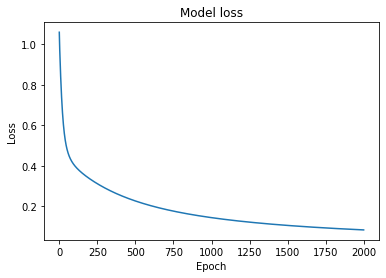

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

꾸준히 손실값이 감소되는 것을 알 수 있군요. 앞서 설명했듯이, 정확도 값의 변화가 없더라도 손실값은 지속해서 감소할 수 있으니 충분한 학습이 필요하겠죠? 

histroy.history 에는 학습기간동안 변화된 `loss` 값이 저장된다는 것은 이미 배웠습니다. 더불어 모델의 compile 시에 metric 값을 지정했을 경우 (본 예제에서는 `"accuracy"`) 지정된 지표에 대한 변화값 역시 저장하고 있습니다. 

history.history 변수의 자료형은 dictionary인데, 먼저 키값을 조회해 보지요. 

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

앞서 설명한 것 처럼, 'loss'와 'accuracy'를 키로 가지고 있습니다. 

각 키에 대한 `value`로 반복학습 동안 변화된 값을 리스트로 갖습니다. 

`accuracy`의 변화를 그래프로 그려볼까요?

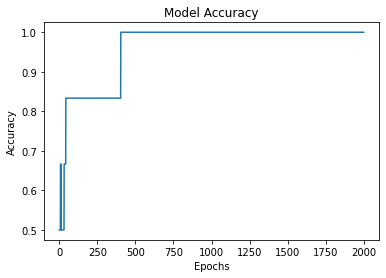

In [ ]:
plt.plot(history.history["accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

정확도는 500 epoch 이후 부터는 1 (100%) 수준을 보이고 있네요. 

 학습이 잘 진행되었으며, 이제 새로운 입력데이터([2,1])에 대한 모델의 예측값을 도출해 보겠습니다. 
 
 모델의 예측값은 두가지로 생각해 볼 수 있습니다(실제로 keras 에서도 두가지에 대한 예측 함수를 제공하고 있습니다). 

 먼저, 여러분의 입력데이터를 regression으로 선형 변환하고, sigmoid로 0과 1사이의 비선형 변환한 값을 도출할 수 있습니다.

 둘째, 이렇게 도출된 sigmoid 값을 기준으로 0 혹은 1, 둘중 하나로 변환시킨 값을 생각해 볼 수 있습니다. 즉, sigmoid 값을 0.5와 비교하여 크거나 작음을 기준으로 0 또는 1로 변환하는 것입니다. 

 위 두가지 경우에 대하여 사용할 수 있는 함수는, predict()와 predict_classes() 입니다. 

먼저 model의 산출값을 실수로 예측하는 predict() 함수를 사용해 보겠습니다. 

In [ ]:
print("[[2,1]] ==>", model.predict(np.array([[2,1]])))

[[2,1]] ==> [[0.02916044]]


출력값이 0.5 보다 작으니 여러분의 이 결과를 가지고 해당 입력데이터를 0 class로 분류할 수 있습니다. 

바로 분류 결과를 보고 싶다면 predict.classes() 함수를 사용할 수 있습니다. 

In [ ]:
print("[[2,1]] ==> ", model.predict_classes(np.array([[2,1]])))

[[2,1]] ==>  [[0]]
